**REGRESIÓN LINEAL**

La regresión lineal es una técnica estadística que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. El objetivo de la regresión lineal es encontrar una línea recta que mejor represente la relación entre estas variables.

**Regresión lineal simple:** Este tipo de regresión lineal involucra solo dos variables, una variable independiente y una variable dependiente. La relación entre las dos variables se modela mediante una línea recta.

Supongamos que se tiene un conjunto de datos que muestra la cantidad de tiempo que los estudiantes pasan estudiando y sus calificaciones en un examen. El objetivo es determinar si hay una relación lineal entre el tiempo de estudio y las calificaciones, y si es así, utilizar la regresión lineal para predecir las calificaciones de un estudiante en función del tiempo que pasan estudiando.

Primero, se deben importar las bibliotecas necesarias y cargar los datos en un DataFrame de Pandas:

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# cargar los datos

datos = {
    'PRIMER_PARCIAL': [8.55,7.95,8.12,8.41,8.66,5.78,6.81,7.38,6.57,8.73,8.67,8.51,7.54],
    'HORAS': [3,2,3,3,3,0,2,2,3,4,4,4,4]
}

data = pd.DataFrame(datos)

data.to_csv("NOTAS.csv", index=False)
# visualizar los primeros registros
print(data)

    PRIMER_PARCIAL  HORAS
0             8.55      3
1             7.95      2
2             8.12      3
3             8.41      3
4             8.66      3
5             5.78      0
6             6.81      2
7             7.38      2
8             6.57      3
9             8.73      4
10            8.67      4
11            8.51      4
12            7.54      4


El archivo "NOTAS.csv" contiene los datos de 10 estudiantes, que se presentan en la siguiente tabla:

Ahora se van a agregar 50 datos más a la lista

In [3]:
# visualizar los primeros registros
print(data)

    PRIMER_PARCIAL  HORAS
0             8.55      3
1             7.95      2
2             8.12      3
3             8.41      3
4             8.66      3
5             5.78      0
6             6.81      2
7             7.38      2
8             6.57      3
9             8.73      4
10            8.67      4
11            8.51      4
12            7.54      4


A continuación, se deben separar las variables independientes de la variable dependiente

In [4]:
# separar las variables independientes y dependiente
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
X

array([[8.55],
       [7.95],
       [8.12],
       [8.41],
       [8.66],
       [5.78],
       [6.81],
       [7.38],
       [6.57],
       [8.73],
       [8.67],
       [8.51],
       [7.54]])

In [6]:
y

array([3, 2, 3, 3, 3, 0, 2, 2, 3, 4, 4, 4, 4])

Luego, se puede ajustar la línea de regresión utilizando el modelo de regresión lineal de Scikit-learn:

In [7]:
# ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

Finalmente, se puede visualizar la línea de regresión y predecir la calificación del PRIMER PARCIAL EN FUNCION DE LAS HORAS

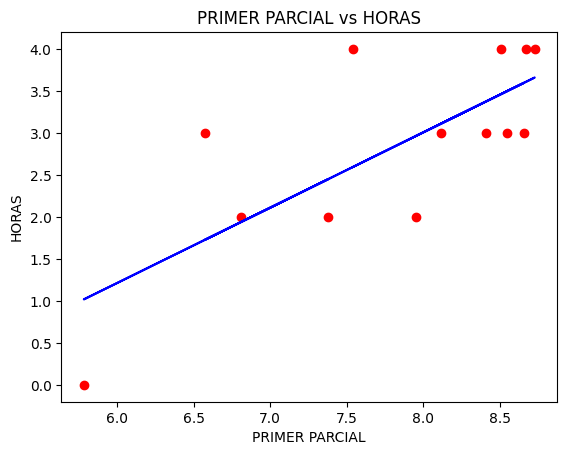

Calificación predicha: [3.00594385]


In [8]:
# visualizar la línea de regresión
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('PRIMER PARCIAL vs HORAS')
plt.xlabel('PRIMER PARCIAL')
plt.ylabel('HORAS')
plt.show()

# predecir la calificación de un estudiante que invierte 6 horas de studio
horas_estudio = [[8]]
print("Calificación predicha:", regressor.predict(horas_estudio))

**EVALUACIÓN DEL MODELO**

Para evaluar la calidad de un modelo de regresión lineal, hay varias métricas que se pueden utilizar. Aquí se presentan algunas de las más comunes:

**1. Error cuadrático medio (MSE):** Esta métrica calcula el promedio de los errores al cuadrado entre las predicciones y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo.

In [9]:
from sklearn.metrics import mean_squared_error

# calcular el MSE
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)

MSE: 0.5449998963871294


**2. Coeficiente de determinación (R2):** Esta métrica mide la proporción de la varianza en la variable dependiente que se puede explicar por la variable independiente. Un R2 más alto indica un mejor ajuste del modelo.

In [10]:
from sklearn.metrics import r2_score

# calcular el R2
r2 = r2_score(y, y_pred)
print("R2:", r2)

R2: 0.5485049877969368


**3. Gráfico de residuos:** Un gráfico de residuos muestra la diferencia entre los valores reales y las predicciones en función de las variables independientes. Si las predicciones son precisas, los residuos deberían estar distribuidos aleatoriamente alrededor de cero. Si hay un patrón en los residuos, puede ser una indicación de que el modelo no está capturando completamente las relaciones entre las variables.

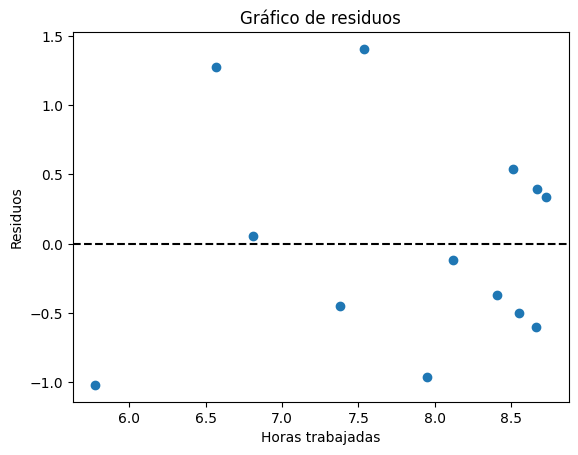

In [11]:
# crear un gráfico de residuos
residuos = y - y_pred
plt.scatter(X, residuos)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Horas trabajadas')
plt.ylabel('Residuos')

plt.show()

Estas métricas pueden ayudar a evaluar la calidad de un modelo de regresión lineal y determinar si es adecuado para el conjunto de datos y el problema en cuestión. Es importante tener en cuenta que ninguna métrica por sí sola puede decir si un modelo es adecuado, por lo que se deben considerar varias métricas en conjunto.